In [172]:
#Scene Segmentation and Interpretation
#Lab2 : logistic regression
#Pamir Ghimire, MSCV 2016-2018, UBourgogne

In [173]:
#include some libraries
%matplotlib inline
%pprint off
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from numpy import linalg

Pretty printing has been turned ON


In [174]:
# A function for visualizing binary data over 2-dimensional domain

def plotData(X, y):
    plt.figure()
    
    #Data with positive labels (label = 1)
    idx = (y == 1)
    Xpos = X[idx,:]
    p1 = plt.scatter(Xpos[:,0], Xpos[:,1], marker = '+', color = 'k')
    
    #Data with negative labels (label = 0)
    idx = (y == 0)
    Xneg = X[idx,:]
    p2 = plt.scatter(Xneg[:,0], Xneg[:,1], marker = 'o', color = 'y')

    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend([p1, p2], ["Admitted", "Not Admitted"])
    plt.show()    

In [175]:
# Returns sigmoid function's response to the supplied scalar, vector
# or matrix
def sigmoid (x):
    y = 1.00 / (1 + np.exp(-x))
    return y


In [176]:
# Cost function : returns cross-entropy for performing logistic regression

def costFunction(w, X, y):
    # append a column of 1s to the data matrix X
    nrows = np.size(X, 0)
    onesCol = np.ones((nrows, 1))
    Xa = np.column_stack((onesCol, X))

    # initialize the error/cost to be returned
    E = 0

    # accumulate error
    for nlabel in range(0, nrows):
        phi_n = sigmoid( np.dot( np.transpose(w), Xa[nlabel,:] ) )
        E = E - ( y[nlabel]*np.log(phi_n) + (1 - y[nlabel]) * np.log(1 - phi_n) ) 

    # Normalize cost
    E = (1./nrows) * E
    
    return E

In [177]:
# Gradient of the cost function in above cell
def costFunctionGrad(w, X, y):
    # append a column of 1s to the data matrix X
    nrows = np.size(X, 0)
    onesCol = np.ones((nrows, 1))
    Xa = np.column_stack((onesCol, X))

    ncols_xa = np.size(Xa, 1)
    
    # initialize the error/cost gradient to be returned
    E_grad = np.zeros((1, ncols_xa))
    
    # 'accumulate' the gradient
    for nlabel in range(0, nrows):
        phi_n = sigmoid( np.dot( np.transpose(w), Xa[nlabel,:] ) )
        E_grad = E_grad + (phi_n - y[nlabel]) * Xa[nlabel,:]

    return E_grad

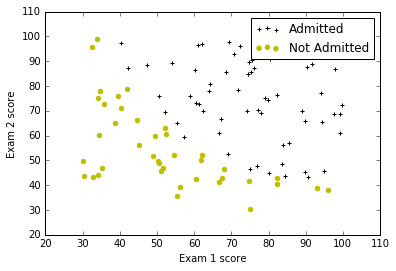

In [178]:
#READ DATA1 FILE AND DISPLAY DATA USING SCATTER PLOT

#read the text file lab2data1.txt
data_mat = np.loadtxt("lab2data1.txt", delimiter= ",")

#unpack the columns into variables X and y
x1 = data_mat[:,0]
x2 = data_mat[:,1]
X = np.column_stack((x1, x2))

y = data_mat[:,2]

#Scatter plot the data
plotData(X, y)

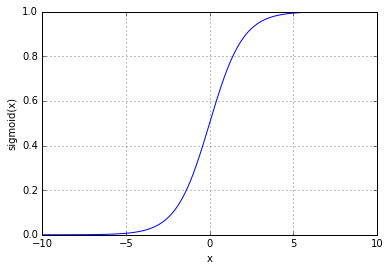

In [179]:
# Test the response of the sigmoid function
x_sig = np.linspace(-10, 10, 1000)
y_sig = sigmoid(x_sig)

plt.figure, plt.plot(x_sig, y_sig)
plt.xlabel('x'), plt.ylabel('sigmoid(x)')
plt.grid()

In [180]:
# Test the cost function

ncols = np.size(X, 1)
w_test = np.zeros((ncols + 1, 1))
e_test = costFunction(w_test, X, y)  

print 'Cost for test weight of zeros = ', e_test

Cost for test weight of zeros =  [ 0.69314718]


In [181]:
# Find optimal value for parameters 'w' (logistic regression)
from scipy import optimize

ncols = np.size(X, 1)
w_init = np.zeros((ncols + 1, 1))

w_allResults = optimize.minimize(costFunction, w_init, args=(X, y), method='TNC', jac = costFunctionGrad)
w = w_allResults.x

print 'Optimized parameters W for separating data in X:' , w

Optimized parameters W for separating data in X: [-25.21601548   0.20666905   0.2019143 ]


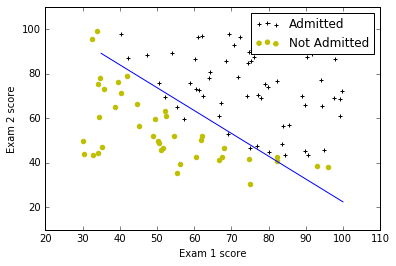

In [182]:
# Visualizing the decision boundary

#Data with positive labels (label = 1)
idx = (y == 1)
Xpos = X[idx,:]
p1 = plt.scatter(Xpos[:,0], Xpos[:,1], marker = '+', color = 'k')

#Data with negative labels (label = 0)
idx = (y == 0)
Xneg = X[idx,:]
p2 = plt.scatter(Xneg[:,0], Xneg[:,1], marker = 'o', color = 'y')

# Create scatter plot of the labelled datapoints
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend([p1, p2], ["Admitted", "Not Admitted"])

# plot the decision boundary
x_w = np.linspace(35.0, 100.0, num = 1000)
y_w = -(w[0] + w[1]*x_w)/w[2] 

plt.plot(x_w, y_w)

plt.show()